# Elements of $C_L$ as meaningful circuits

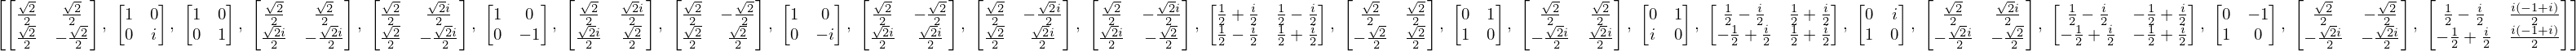

In [1]:
import sympy

M = sympy.Matrix
simplify = sympy.simplify
sqrt = sympy.sqrt
i = sympy.I

from sympy.physics.quantum import Dagger

sympy.init_printing()
H = simplify(M([[1, 1], [1, -1]]) / sqrt(2))
S = M([[1, 0], [0, i]])
C_L = [H, S]
basis_vectors = [M([1, 0]), M([0, 1])]

def getitem(m, i, j):
    # Note that sympy uses an extremely weird way to store the matrices,
    # in particular the internal representation is vastly different from what
    # is printed. For instance the H matrix is stored as a Mul object
    # (even after using simplify) instead of a matrix. 
    # Therefore m[i][j] will NOT work. This is a workaround.
    return (Dagger(basis_vectors[i]) * m * basis_vectors[j])[0]

def is_known(C_L, a):
    for c in C_L:
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return True
    return False
for i in range(5):
    for m in (H, S):
        for c in C_L:
            c = simplify(c*m)
            if(is_known(C_L, c)):
                continue
            C_L.append(c)
C_L

In [2]:
X = M([[0, 1], [1, 0]])
Z = M([[1, 0], [0, -1]])


In [3]:
s2m = {"H": H, "S": S, "X": X, "Z": Z}
def eval_str(s):
    result = M([[1, 0], [0, 1]])
    for c in s:
        result *= s2m[c]
    return result

In [4]:
def get_product_index(a):
    for i,c in enumerate(C_L):
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return i


In [5]:
from itertools import product
from collections import defaultdict

results = defaultdict(set)

def recursive_xs_products(length):
    if(length == 1):
        yield "H"
        yield "S"
        yield "X"
        yield "Z"
    else:
        for p in recursive_xs_products(length - 1):
            yield p
            yield p + "H"
            yield p + "S"
            yield p + "X"
            yield p + "Z"
    
    
for p in recursive_xs_products(5):
    results[get_product_index(eval_str(p))] |= {p}
    

In [6]:
results

defaultdict(set,
            {0: {'H',
  'HHH',
  'HHHHH',
  'HHHXX',
  'HHHZZ',
  'HHXHZ',
  'HHXXH',
  'HHZHX',
  'HHZZH',
  'HSSSS',
  'HSSZ',
  'HSXSX',
  'HSZS',
  'HXHHX',
  'HXHZH',
  'HXSXS',
  'HXX',
  'HXXHH',
  'HXXXX',
  'HXXZZ',
  'HXZXZ',
  'HXZZX',
  'HZHHZ',
  'HZHXH',
  'HZSS',
  'HZXXZ',
  'HZXZX',
  'HZZ',
  'HZZHH',
  'HZZXX',
  'HZZZZ',
  'SHSHS',
  'SSHX',
  'SSSSH',
  'SSZH',
  'SXSHZ',
  'SXSXH',
  'SZSH',
  'XHHHZ',
  'XHHXH',
  'XHSS',
  'XHXXZ',
  'XHXZX',
  'XHZ',
  'XHZHH',
  'XHZXX',
  'XHZZZ',
  'XSXSH',
  'XXH',
  'XXHHH',
  'XXHXX',
  'XXHZZ',
  'XXXHZ',
  'XXXXH',
  'XXZHX',
  'XXZZH',
  'XZHXZ',
  'XZHZX',
  'XZXHX',
  'XZXZH',
  'XZZHZ',
  'XZZXH',
  'ZHHHX',
  'ZHHZH',
  'ZHSXS',
  'ZHX',
  'ZHXHH',
  'ZHXXX',
  'ZHXZZ',
  'ZHZXZ',
  'ZHZZX',
  'ZSSH',
  'ZXHXZ',
  'ZXHZX',
  'ZXXHX',
  'ZXXZH',
  'ZXZHZ',
  'ZXZXH',
  'ZZH',
  'ZZHHH',
  'ZZHXX',
  'ZZHZZ',
  'ZZXHZ',
  'ZZXXH',
  'ZZZHX',
  'ZZZZH'},
 2: {'HH',
  'HHHH',
  'HHSSZ',
  'HHSZS',
  'H

In [8]:
lookup_table = [min(v, key=lambda x:len(x)) for k,v in sorted(results.items(), key=lambda x:x[0])]
lookup_table

['H',
 'S',
 'ZZ',
 'SH',
 'HS',
 'Z',
 'SHS',
 'HZ',
 'ZS',
 'SXH',
 'HSZ',
 'HXSH',
 'HSH',
 'HX',
 'X',
 'ZSH',
 'SX',
 'HXS',
 'XS',
 'SZHS',
 'ZXH',
 'XZ',
 'XSH',
 'HSX']